# Clasificación de Agua Potable 

## Segunda Entrega - CoderHouse - 2021

## Autores:  Andrés Fernández  - Ignacio Nieva

## Introducción

En este documento vamos a utilizar el dataset ya procesado de nombre **"water_potability_clean.csv"**. Este es el resultado obtenido del nootebook de nombre **"Entrega1-Fernandez-Nieva.ipynb"** donde se realizo el data wrangling y el analisis exploratorio de datos en el set de datos originales proveniente del archivo de nombre **"water_potability.csv"**.Por cualquier inquietud se puede visualizar el analisis dentro del notebook correspondiente.
En esta entrega elegimos aplicar el Modelo Random Forest classifier y llevar adelante el analisis correpondiente que detallamos debajo.

## Indice General

### Importación de librerias.
### Importación del dataset. 
### Selección de las features.
### Definición de la variable Target Potability.
### Separación de datos en Entrenamiento y Prueba.
### Creación del Algoritmo Random Forest. 
### Entrenamiento del Algoritmo Random Forest.
### Predicción del Algoritmo Random Forest sobre Entrenamiento y Prueba.
### Matriz de confusión.
### Métrica Accurracy.
### Métrica Precision.
### Métrica Recall.
### Métrica F1 score.
### Métrica Curva Roc.
### Grafica Curva Roc.
### Conclusiones.




# Importamos librerias

In [1]:
# Importamos las libreria de uso
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
#Importamos train y test split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
#Matriz de Confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

# Importamos el dataset 

In [3]:
# Importamos el dataset a un Dataframe de Pandas
data_clean = pd.read_csv('./Datos/water_potability_clean.csv')
# Examinamos una muestra del dataset
data_clean.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
2,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
3,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
4,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0


In [4]:
#Observamos las principales Estadisticas para el conjunto de datos
data_clean.describe().round(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2779.00,2779.00,2779.00,2779.00,2779.00,2779.00,2779.00,2779.00,2779.00,2779.00
mean,7.06,196.66,21504.18,7.12,334.10,425.67,14.30,66.40,3.97,0.39
std,1.15,28.17,7956.40,1.43,34.79,79.91,3.20,14.89,0.76,0.49
min,4.19,122.54,320.94,3.30,187.17,201.62,5.43,27.10,1.87,0.00
25%,6.36,178.41,15515.57,6.16,318.00,365.71,12.09,56.71,3.44,0.00
50%,7.08,197.22,20596.39,7.11,333.78,421.46,14.23,66.40,3.96,0.00
75%,7.76,215.64,26912.80,8.07,350.42,481.26,16.54,76.58,4.50,1.00
max,9.93,272.11,43680.22,10.91,481.03,652.54,23.14,106.37,6.10,1.00


**Resumen de los datos:**
Contamos con 2779 observaciones y 9 variables. 

## Selección de las features

In [5]:
X = data_clean.drop('Potability', axis=1) #Elimino de mi dataset la variable a predecir

## Definición de la variable Target Potability

In [6]:
y = data_clean.Potability

## Separación de datos en Entrenamiento y Prueba.

In [7]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
#creo un array de las metricas que voy a evaluar en cada modelo
metricas=['Accuracy Train','Accuracy Test','Precision Train','Precision Test','Recall Train','Recall Test','F1 Train','F1 Test','Auc']

# Aplicación del algoritmo Random Forest Classifier

## Creación del Algoritmo Random Forest

In [9]:
modelo_random_forest= RandomForestClassifier(random_state=11, n_estimators=150)

## Entrenamiento del modelo

In [10]:
modelo_random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [11]:
y_test_pred_RF = modelo_random_forest.predict(X_test) #Prediccion en Test
y_train_pred_RF = modelo_random_forest.predict(X_train) #Prediccion en Train

## Matriz de confusión del Modelo Random Forest Classifier

In [12]:
#Matriz de Confusión
cfRF = confusion_matrix(y_test, y_test_pred_RF)
print(cfRF)

[[458  56]
 [214 106]]


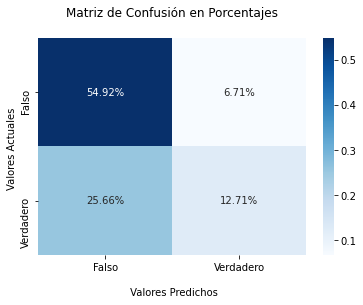

In [13]:
# Gráfico heatmap de matriz de confusión
ax = sns.heatmap(cfRF/np.sum(cfRF), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Matriz de Confusión en Porcentajes\n');
ax.set_xlabel('\n Valores Predichos')
ax.set_ylabel('Valores Actuales ');
ax.xaxis.set_ticklabels(['Falso','Verdadero'])
ax.yaxis.set_ticklabels(['Falso','Verdadero'])
plt.show()

## Métricas para el modelo Modelo Random Forest Classifier

## Accuracy

In [14]:
#Calculo el accuracy en Train
train_accuracy_RF = accuracy_score(y_train, y_train_pred_RF)
print('% de aciertos sobre el set de entrenamiento con Random Forest:',train_accuracy_RF)
#Calculo el accuracy en Test
test_accuracy_RF = accuracy_score(y_test, y_test_pred_RF)
print('% de aciertos sobre el set de evaluación con Random Forest:',test_accuracy_RF)

% de aciertos sobre el set de entrenamiento con Random Forest: 1.0
% de aciertos sobre el set de evaluación con Random Forest: 0.6762589928057554


## Precision

In [15]:
#Calculo precision Score en Train
train_precision_RF = precision_score(y_train, y_train_pred_RF)
print('Precision Score sobre el set de entrenamiento con Random Forest:',train_precision_RF)
#Calculo precision Score en Test
test_precision_RF = precision_score(y_test, y_test_pred_RF)
print('Precision Score sobre el set de evaluación con Random Forest:',test_precision_RF)

Precision Score sobre el set de entrenamiento con Random Forest: 1.0
Precision Score sobre el set de evaluación con Random Forest: 0.654320987654321


## Recall

In [16]:
#Calculo recall Score en Train
train_recall_RF = recall_score(y_train, y_train_pred_RF)
print('Recall Score sobre el set de entrenamiento con Random Forest:',train_recall_RF)
#Calculo recall Score en Test
test_recall_RF = recall_score(y_train, y_train_pred_RF)
print('Recall Score sobre el set de evaluacion con Random Forest:',test_recall_RF)


Recall Score sobre el set de entrenamiento con Random Forest: 1.0
Recall Score sobre el set de evaluacion con Random Forest: 1.0


## F1 Score

In [17]:
#Calculo F1 Score en Train
train_f1_RF = f1_score(y_train, y_train_pred_RF)
print('F1 Score sobre el set de entrenamiento con Random Forest:',train_f1_RF)
#Calculo F1 Score en Test
test_f1_RF = f1_score(y_train, y_train_pred_RF)
print('F1 Score sobre el set de evaluacion con Random Forest:',test_f1_RF)

F1 Score sobre el set de entrenamiento con Random Forest: 1.0
F1 Score sobre el set de evaluacion con Random Forest: 1.0


## CURVA - ROC

In [18]:
class_probabilities_RF = modelo_random_forest.predict_proba(X_test)
preds_RF = class_probabilities_RF[:, 1]
fpr_rf, tpr_rf, threshold = roc_curve(y_test, preds_RF)
roc_auc_RF = auc(fpr_rf, tpr_rf)
# AUC
print(f"AUC for our classifier is: {roc_auc_RF}")

AUC for our classifier is: 0.6691603842412451


## Gráfica de la Curva ROC

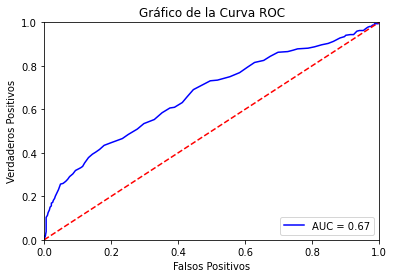

In [19]:
plt.title('Gráfico de la Curva ROC')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
plt.show()

# Conclusiones sobre el modelo Random Forest Classifier

In [20]:
metricas_RF = [train_accuracy_RF, test_accuracy_RF,train_precision_RF,test_precision_RF,train_recall_RF,test_recall_RF,train_f1_RF,test_f1_RF,roc_auc_RF] 
Valores_RF = pd.Series(metricas_RF,index=metricas)
Valores_RF

Accuracy Train     1.000000
Accuracy Test      0.676259
Precision Train    1.000000
Precision Test     0.654321
Recall Train       1.000000
Recall Test        1.000000
F1 Train           1.000000
F1 Test            1.000000
Auc                0.669160
dtype: float64

De acuerdo al proceso llevado a cabo sobre el modelo podemos decir que tiene una probabilidad de acierto del 67% sobre test que lo podemos ver tanto por la matriz de confusión como en el rendimiento segun expone el grafico de la curva roc. 
Respecto de train y test se ve que el modelo overfitea y eso se puede deber a la existencia de outliers mas el desbalanceo de la muestra.
Se realizo la aplicacion de PCA para ver si se podia reducir algunas features pero al no tener una gran correlación entre las variables no podemos excluir ni mejorar el rendimiento. 
La elección del algoritmo prevalecio sobre la evaluación de otros como Arbol de Decisión, KNN, Regresion Logistica y GaussianNB.